# Optical tweezer forces (modeled as Gaussian beam of known wavelength)

In [74]:
from matplotlib import pyplot as  plt
import numpy as np
from scipy import constants as sp
from inspect import signature

def trap_force_axial(a, z, n_p, n_m): #what is dependence on a, at some z?
#calculate the prefactor that depends on properties of the particle and of the medium
    #begin by defining quantities that matter in SI units
    pi = sp.pi
    e_0 = sp.epsilon_0 #vacuum permittivity
    wavelength = 1064*10**-9 
    k = 2*pi/wavelength
    sig = signature(trap_force_axial)
    alpha = (n_p**2 - n_m**2)/(n_p**2 + 2*n_m**2)
    prefactor = (pi * e_0 * n_m**2 * a**3 * alpha)/(1 + (2/3 * k**3 * a**3) * alpha**2)
#calculate the spatia l dependence term
    u_0 = 1 #??? Highly affects scale
    w_0 = 1*10**-3 #beam waist: on the order of mm?
    z_R = pi * w_0**2/k #Rayleigh range
    x,y = 1*10**-6, 1*10**-6 
    r = np.sqrt(x**2 + y**2)
    #r = 0 #if central axis
    arg = (-2*r**2/w_0**2 * z_R**2) / (z**2 + z_R**2)#argument of the exponential
    spatial = 2*u_0**2 * z_R**2 * z * np.exp(arg) * ((2*r**2/w_0**2 - 1)*z_R**2 - z**2) / (z**2 + z_R**2)**3
    return prefactor*spatial

def explore_z(a, n_p, n_m):
    z_list = np.arange(-5*10**-9, 5*10**-9, 1*10**-10) 
    f_list = [trap_force_axial(a, z, n_p, n_m) for z in z_list]
    plt.figure(0)
    plt.xlabel('z (m)')
    plt.ylabel('F (N)')
    plt.plot(z_list, f_list)
    
def explore_a(z, n_p, n_m):
    a_list = np.arange(0.1*10**-6, 5*10**-6, 1*10**-9) #0.1 micron to 5 microns
    f_list = [trap_force_axial(a, z, n_p, n_m) for a in a_list]
    plt.figure(0)
    plt.xlabel('a (m)')
    plt.ylabel('F (N)')
    plt.plot(a_list, f_list)
    
def explore_n(a, z):
    delta_list, f_list = [], []
    np_list = np.arange(1.33, 1.60, 0.01)
    nm_list = np.arange(1.33, 1.60, 0.01)
    for n_p in np_list:
        for n_m in nm_list:
            delta = n_p - n_m
            delta_list.append(delta)
            f_list.append(trap_force_axial(a, z, n_p, n_m))            
    plt.figure(0)
    plt.xlabel('$\delta n$')
    plt.ylabel('F (N)')
    plt.plot(delta_list, f_list, 'b.')
    
def scat_force():
    return

#### Attractive force dependence on $z$ (1 um silica in DMSO):

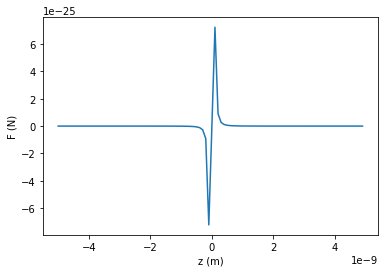

In [68]:
explore_z(1*10**-6, 1.42, 1.47) 

#### Attractive force dependence on $z$ (1 um PS in DMSO)

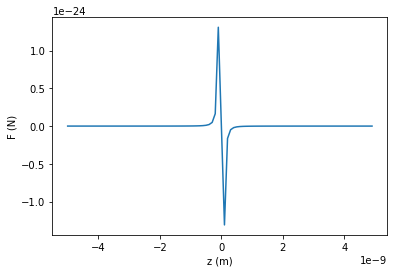

In [69]:
explore_z(1*10**-6, 1.59, 1.47) 

#### Attractive force dependence on $a$ (PS in DMSO) 

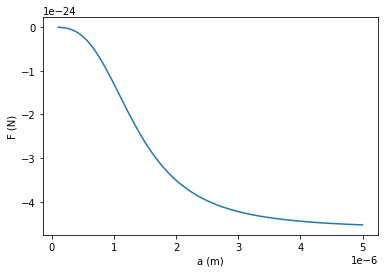

In [70]:
explore_a(1*10**-10, 1.59, 1.47)

#### Attractive force dependence on ($\Delta n = n_p - n_m$)

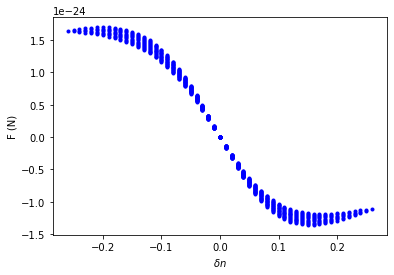

In [75]:
explore_n(1.0*10**-6, 1*10**-10)